<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/notes/mod3_greens_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sympy import Curve, line_integrate, ln, E
import sympy as sym

sym.init_printing()


In [2]:
x, y, z, t, r, theta = sym.symbols('x y z t r theta')


## Green's Theorem

Let C be a simply conneted piecewise smooth curve with a counterclockwise orientation in a plane region R. Let F = $ \left \langle f(x,y), g(x,y) \right \rangle $ and $ f $ and $ g $ have continous first order partial derivatives.

$$ \int_C F \cdot dr = \int_C f \ dx + g \ dy = \iint_R \left( \frac{\partial g}{\partial x} - \frac{\partial f}{\partial y} \right) dA $$

Notation note: when the path of integration satisfies Green's Theorem, we can denote the line integral as

$$ \oint\limits_C f \ dx + g \ dy $$



---


### Example 1

In [3]:
# F = <y^3, 6xy^2>
g = 6*x*y**2
f = y**3

g,f

In [4]:
dgx = sym.diff(g, x)
dfy = sym.diff(f, y)

dgx, dfy

In [5]:
ylim = [0, sym.sqrt(x)]
int_y = sym.integrate(dgx - dfy, (y, ylim[0], ylim[1]))
int_y

In [6]:
xlim = [0, 4]

# just ans
sym.integrate(int_y,(x, xlim[0], xlim[1]))

# save/show integrand
int_x = sym.integrate(int_y)
display(int_x)
print('\n')
int_x.subs(x, xlim[1])-int_x.subs(x, xlim[0])

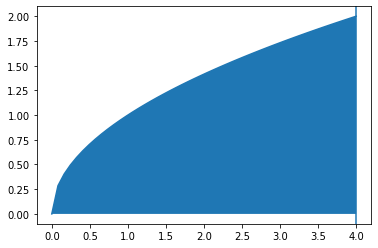

In [7]:
# Make Data
xvals = np.linspace(xlim[0],xlim[1])
yvals = np.sqrt(xvals)

plt.plot(xvals, yvals)
plt.axvline(x=xlim[1])
#plt.axhline(y=xlim[0])
plt.fill_between(xvals, yvals)



---
### Example 2
Polar coordinates


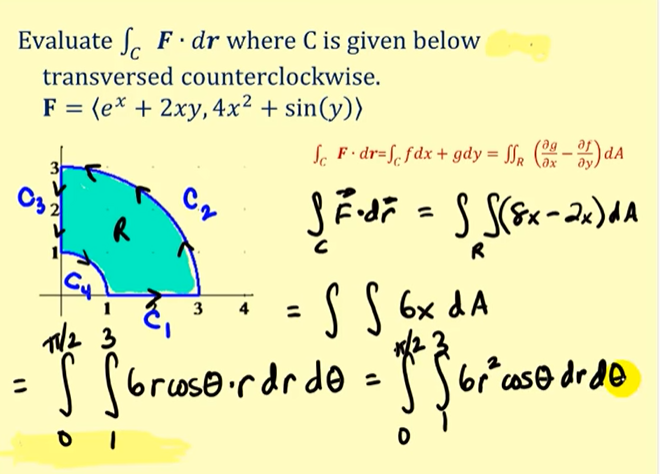

In [8]:
# F = <e^x + 2xy, 4x^2 + sin(y)>
f = E**x + 2*x*y
g = 4*x**2 + sym.sin(y)
f, g

In [9]:
dgx = sym.diff(g, x)
dfy = sym.diff(f, y)

dgx, dfy

In [10]:
int_A = (dgx - dfy)
int_A

In [11]:
int_polar = int_A.subs(x, r*sym.cos(theta)) * r # with extra polar factor r
int_polar

In [12]:
# evaluate polar integral
rlim = [1, 3]
theta_lim = [0, sym.pi/2]

sym.integrate(int_polar, (r, rlim[0], rlim[1]), (theta, theta_lim[0], theta_lim[1]))

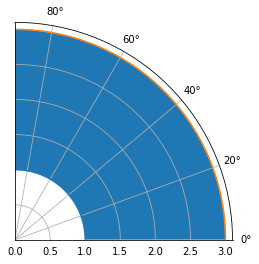

In [13]:
# Plot Polar Coords
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_thetamax(90)

theta_vals = np.linspace(0, np.pi/2, 100)

r1 = np.ones(100)*1
r2 = np.ones(100)*3
plt.polar(theta_vals, r1, theta_vals, r2)
plt.fill_between(theta_vals, r1, r2)
plt.show()



---


### Area Using Line Integrals

Let C be a simply connected piecewise smooth curve with a counterclockwise orientation in the plane region R

$$ A_{R} = \frac{1}{2} \int_C x dy - y dx $$


In [52]:
xlim = [-5, 5]
ylim = [-3, 3]

x_vals = np.linspace(xlim[0], xlim[1], 100)
y_vals = np.linspace(ylim[0], ylim[1], 100)

ecc_eq = x**2/16 + y**2/4
# ecc_plot = sym.plot_implicit(ecc_eq <= 1)

In [53]:
x_lint = 4*sym.cos(t)
y_lint = 2*sym.sin(t)

dx_lint = sym.diff(x_lint)
dy_lint = sym.diff(y_lint)

dx_lint,dy_lint

In [54]:
line_int = x_lint * dy_lint - y_lint * dx_lint
display(line_int)

intlim = [0, 2*sym.pi]
A_R = 1/2 * sym.integrate(line_int, (t, intlim[0], intlim[1]))
display(A_R)



---


## Flux Form of Green's Theorem

Let C be a simple closed smooth curve oriented counterclockwise that encloses region R in a plane. Let $ F = \left \langle f(x,y), g(x,y) \right \rangle $ with $ f $ and $ g $ having continuous partial derivatives.

$$ \oint \limits_C F \cdot n \ ds = \iint \limits_R div F dA = \iint \limits_R \left( \frac{\partial f}{\partial x} + \frac{\partial g}{\partial y} \right ) dA $$

where $ n $ is an outward facing unit normal vector and $ div F $ is the divergence of **F**

This is called the flux and measures the flow moving across C.

*It is similar to Green's Theorem except flux integrates the perpendicular or normal parts of the vector field while Green's Theorem integrates the tangential part of the vector field. This is the Divergence Theorem in a Plane*


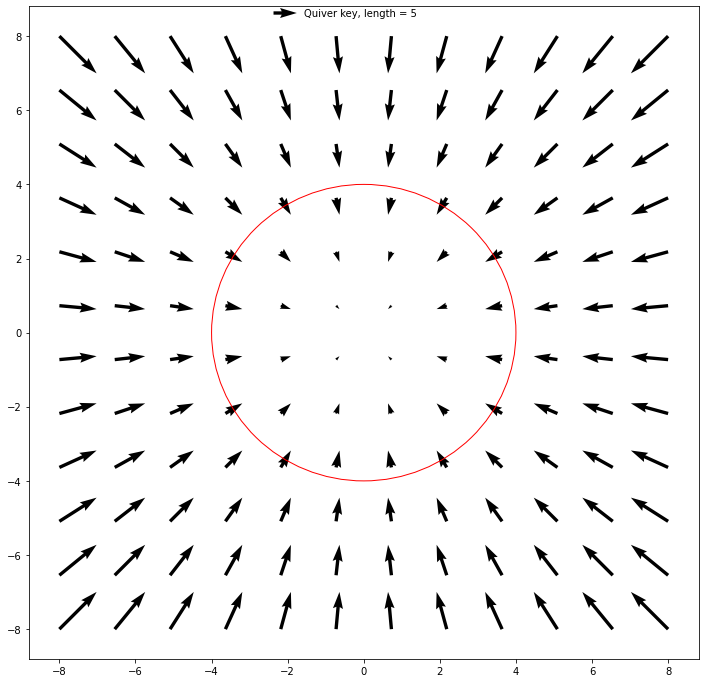

In [46]:
# Visualize

X = np.linspace(-8, 8, 12)
Y = np.linspace(-8, 8, 12)
U, V = np.meshgrid(X, Y)

fig3, ax = plt.subplots(figsize=(12,12))

q = ax.quiver(X, Y, -U, -V)
ax.quiverkey(q, X=0.4, Y=0.99, U=5,
             label='Quiver key, length = 5', labelpos='E')
circle = plt.Circle((0, 0), 4, color='r', fill=False)
ax.add_artist(circle)
plt.show()

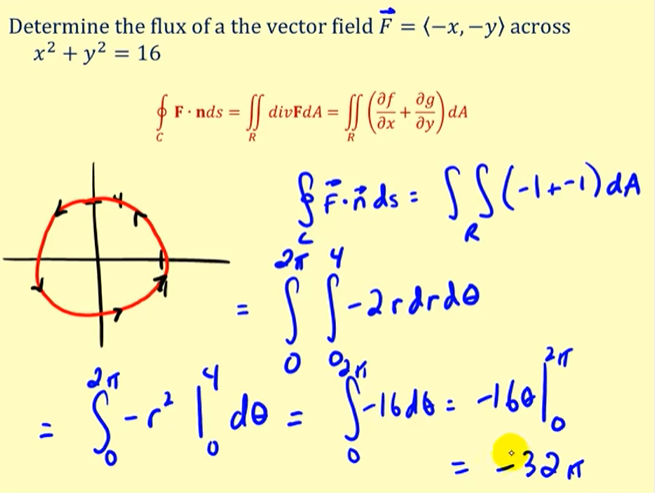

In [47]:
f = -x
g = -y
dfx = sym.diff(f)
dgy = sym.diff(g)
display(dfx, dgy)
flux_int = dfx + dgy
display(flux_int)


In [51]:
# Convert to Polar Coords
rlim = [0, 4]
theta_lim = [0, 2*sym.pi]
p_flux_int = flux_int*r
polar_flux = sym.integrate(p_flux_int, (r, rlim[0], rlim[1]), (theta, theta_lim[0], theta_lim[1])) 
polar_flux